# DATA ANALYTICS WITH OASIS INFOBYTE

by Simphiwe Lynette Mahlangu

**Data Analysis Project**
* Project title: Predicting House Prices with Linear Regression
* Task: Level 2

**Description**

The objective is to build a predictive model using linear regression estimating a numerical outcome based on the data set with relevant features. Linear regression is a fundamental machine learning algorithm, and this project provides hands-on experience in developing, evaluating, and interpreting a predictive model.

**Key Concepts and Challenges:**
* Data Collection
* Data Exploration and Cleaning
* Feature Selction
* Model Trainng 
* Model Evaluation
* Visualization

**Learning Ojectives**
* Understanding of linear regression concepts.
* Pratical experience in implementing a predictive model.
* Model evaluation and interpretation skills.

**About Dataset**
This is a dataset containing prices of properties from a real estate company, planning to use the data to optimise the sale prices of their properties based on:

* Variables affecting house prices (e.g., area, number of rooms, bathrooms, ect).
* A linear model that quantitatively relates house prices with above variables.
* And how well these variables can predict house prices.

**Section A: Importing Python Libraries and Data Reading**

* Pandas: Data cleaning and analysis
* Numpy: Statistical analysis
* Matplotlib and seaborn: data visualization

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/housing-dataset/Housing.csv


**Section B: Data Exploration and Cleaning**

Loading and reading in the first and last five rows of the data using *head()* and *tail()* for data exploration.

**b.1: Exploration**

Used *describe()* and *info()* methods to check if the data is intepreted correctly and apparent relations are meaningful.

In [2]:
ph_df= pd.read_csv('/kaggle/input/housing-dataset/Housing.csv')
ph_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Descriptive Analysis
ph_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
#Data Information
ph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#Last Five Rows
ph_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


**b.2: Data Cleaning**

Data cleaning is the process of fixing and/or removing incorrect, corrupt, duplicate, or incomplete data within a dataset. This includes ensuring:
* Data integrity
* Missing Data Handling
* Duplicate Removal
* Standarlization
* Outlier Detection

***Checking and Dealing with Missing Values***

Checking for missing values to make sure that if present, they are removed/replaced so they do not cause unexpected or biased analysis results. 

Used *isnull().sum()* to filter out, impute, and calculate missing values based on statistical analysis. Note: There are no missing values identifed.

In [6]:
ph_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

***Checking and Removing Duplicated Data***

Used *drop_duplicates()* to check and remove repeated data points in the data set to ensure data integrity.

Note: There are no duplicated data points because the dataset returned with a total of 545 columns and 13 columns. Exactly like the orginal dataset.

In [7]:
ph_df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Data Standarlization and Detecting Outliers**

Data standarlization involves consistent formating and units across the dataset for accurate analysis.

* z-score standarlization: used the 'price' column to calculate the z-score.
* The z-score can be used to detact and remove outliers for further accuracy and inclusion in the dataset.


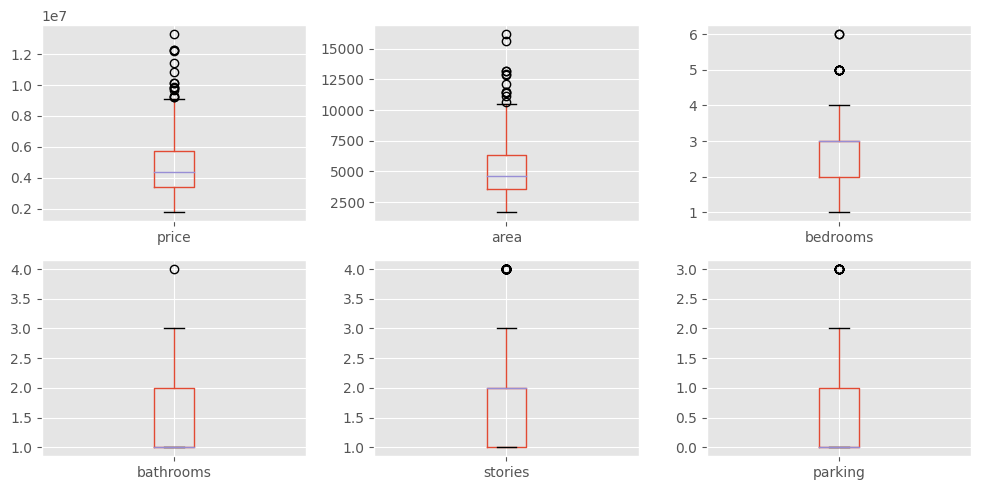

In [8]:
numeric_col = ['price','area','bedrooms','bathroom','stories','parking']

fig, axs = plt.subplots(2, 3, figsize = (10,5))

a= ph_df.boxplot('price', ax = axs[0,0])
b= ph_df.boxplot('area', ax = axs[0,1])
c= ph_df.boxplot('bedrooms', ax = axs[0,2])

d= ph_df.boxplot('bathrooms', ax = axs[1,0])
e= ph_df.boxplot('stories', ax = axs[1,1])
f= ph_df.boxplot('parking', ax = axs[1,2])

plt.tight_layout()

From the box plots above, we can see that the 'price' and 'area' columns have considerable outliers that I plan removing down below.

***Dropping Outliers in 'Price' and 'Area' columns:***

In [9]:
from scipy.stats import zscore

#Analysing Price Outliers
ph_df['zscore-price'] = zscore(ph_df['price'])
threshold = 2
ph_df['outliers'] = np.where((ph_df['zscore-price'] - threshold > 0), True,
                             np.where(ph_df['zscore-price']+ threshold < 0, True, False))
ph_df.drop(ph_df[ph_df['outliers']== True].index, inplace =  True)

#Analysing Area Outliers
ph_df['zscore-area'] = zscore(ph_df['area'])
threshold= 2
ph_df['outliers'] = np.where((ph_df['zscore-area'] - threshold > 0), True,
                             np.where(ph_df['zscore-area']+ threshold < 0, True, False))
ph_df.drop(ph_df[ph_df['outliers']== True].index, inplace =  True)

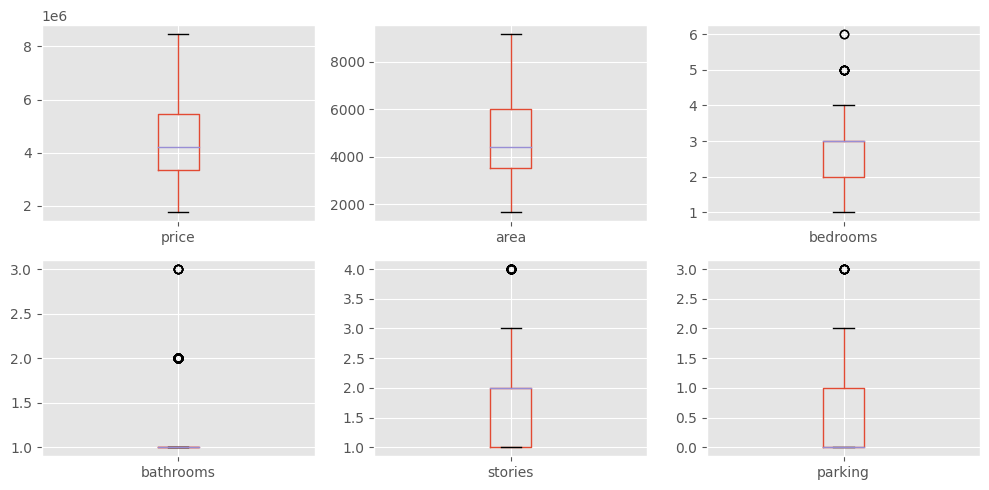

In [10]:
fig, axs = plt.subplots(2, 3, figsize = (10,5))

a= ph_df.boxplot('price', ax = axs[0,0])
b= ph_df.boxplot('area', ax = axs[0,1])
c= ph_df.boxplot('bedrooms', ax = axs[0,2])

d= ph_df.boxplot('bathrooms', ax = axs[1,0])
e= ph_df.boxplot('stories', ax = axs[1,1])
f= ph_df.boxplot('parking', ax = axs[1,2])

plt.tight_layout()

***Turning Categorical Variables Into Quantitative Variables***

Most statistical models cannot take in the objects/strings as input, especially if we are trying to fit the dataset into a regression. I wil be using **pandas.get_dummies()** to convert categorical variables to dummy variables:

* Assign:
    0 = No; 
    1 = Yes; 
    00 = furnished; 
    01 = unfurnished; and 
    10 = semi-furnished.

In [11]:
categorical_col = ['mainroad','guestroom','basement','hotwaterheating',
                   'airconditioning','prefarea']

name= ph_df[categorical_col].value_counts()
name.head()

mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
yes       no         no        no               no               no          145
                                                yes              no           58
                     yes       no               no               no           42
no        no         no        no               no               no           42
yes       no         no        no               no               yes          25
Name: count, dtype: int64

In [12]:
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
ph_df[categorical_col] = ph_df[categorical_col].apply(binary_map)
ph_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,zscore-price,outliers,zscore-area
26,8463000,6000,3,2,4,1,1,1,0,1,0,1,semi-furnished,1.977966,False,0.467418
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished,1.944253,False,1.854154
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,unfurnished,1.944253,False,1.407987
29,8400000,5500,4,2,2,1,0,1,0,1,1,1,semi-furnished,1.944253,False,0.226246
30,8400000,7475,3,2,4,1,0,0,0,1,2,0,unfurnished,1.944253,False,1.178874


In [13]:
dummies = pd.get_dummies(ph_df['furnishingstatus'], dtype= int, drop_first= True)
ph_df = pd.concat([ph_df, dummies], axis = 1)

ph_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,zscore-price,outliers,zscore-area,semi-furnished,unfurnished
26,8463000,6000,3,2,4,1,1,1,0,1,0,1,semi-furnished,1.977966,False,0.467418,1,0
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished,1.944253,False,1.854154,1,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,unfurnished,1.944253,False,1.407987,0,1
29,8400000,5500,4,2,2,1,0,1,0,1,1,1,semi-furnished,1.944253,False,0.226246,1,0
30,8400000,7475,3,2,4,1,0,0,0,1,2,0,unfurnished,1.944253,False,1.178874,0,1


**SECTION C: Model Development**

Now that the data is cleaned and prepared, decided to drop a couple of columns from the dataset so it can fit a simple linear model estimator.

This section focuses on model development, evaluation, and refinement. More pandas libraries have been imported for Linear Regression Analysis.

In [14]:
ph_df = ph_df.drop(['furnishingstatus','outliers', 'zscore-area', 'zscore-price'], axis= 1)
ph_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
26,8463000,6000,3,2,4,1,1,1,0,1,0,1,1,0
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,1,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1
29,8400000,5500,4,2,2,1,0,1,0,1,1,1,1,0
30,8400000,7475,3,2,4,1,0,0,0,1,2,0,0,1


***C.1: Spliting the Dataset into Train and Test Sets***

This includes exploring and visualizing correlations between features and the target variables in the dataset.

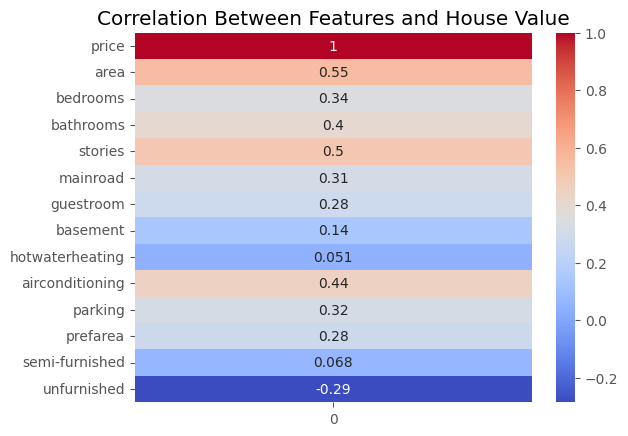

In [16]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
x_train, y_train, x_test, y_test = train_test_split(ph_df, ph_df, test_size= 0.3, train_size= 0.7,
                                                   random_state= 100)
sns.heatmap(x_train.corrwith(x_train['price']).to_frame(),annot = True,
                            cmap= 'coolwarm')
plt.title('Correlation Between Features and House Value')

plt.show()

In [18]:
numeric_cols = ['area','bedrooms','bathrooms','stories','parking']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
116,6020000,0.696491,0.25,0.5,0.000000,1,1,1,0,0,0.000000,1,0,1
353,3780000,0.154835,0.25,0.0,0.666667,1,0,0,0,0,0.000000,1,0,0
539,1855000,0.172783,0.00,0.0,0.000000,0,0,0,0,0,0.333333,0,0,1
162,5460000,0.656309,0.50,0.5,0.333333,1,1,1,0,0,0.000000,1,1,0
355,3773000,0.877310,0.25,0.0,0.000000,1,0,0,0,0,0.666667,0,0,0


In [19]:
from sklearn.linear_model import LinearRegression

target= 'price'
x_train= ph_df.drop(columns = target)
y_train= ph_df[target]

model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
target= 'price'
x_test= ph_df.drop(columns = target)
y_test= ph_df[target]

model= LinearRegression()
model.fit(x_test, y_test)

LinearRegression()

**SECTION D: Model Evaluation**

Evaluating the model's perfomance on a seprate test dataset using Mean_Squared_Error

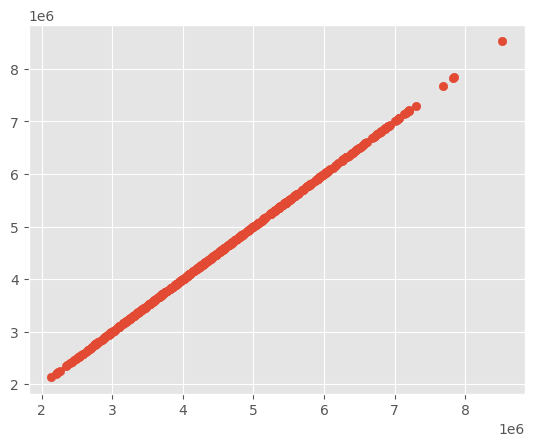

In [21]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

plt.scatter(train_prediction, test_prediction)
plt.show()

**Conclusion: Evaluating Performance**

In [23]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_prediction)
test_mse = mean_squared_error(y_test, test_prediction)

print('train mse:', train_mse)
print('test mse:', test_mse)

train mse: 702976988145.7728
test mse: 702976988145.7728
